In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
os.getcwd()

'/content'

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
Data_Day = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/database_IND.csv')
Data_Day.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


# EXPLORATORY DATA ANALYSIS

In [5]:
#Check Type of DataFrame
print(type(Data_Day))

<class 'pandas.core.frame.DataFrame'>


In [6]:
Data_Day.info

<bound method DataFrame.info of     country  ... estimated_generation_gwh
0       IND  ...                      NaN
1       IND  ...                      NaN
2       IND  ...                      NaN
3       IND  ...                      NaN
4       IND  ...                      NaN
..      ...  ...                      ...
903     IND  ...                      NaN
904     IND  ...                      NaN
905     IND  ...                      NaN
906     IND  ...                      NaN
907     IND  ...                      NaN

[908 rows x 25 columns]>

In [7]:
Data_Day.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [8]:
#Data Types of Varaibles
print(Data_Day.dtypes)

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object


In [9]:
#Dimension
Data_Day.shape

(908, 25)

In [10]:
# Index range
Data_Day.index

RangeIndex(start=0, stop=908, step=1)

In [11]:
#unique values present in each variable
Data_Day.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

***Some of the data seems irrelavant while looking into the ccase scenario. Country name, country_long, Other_fuel2, Other_fuel3, wepp_id, year_of_capacity_data, generation_data_source, estimated_generation_gwh is the same data which has only one input or no input across the column therefore we can remove these column.

In [12]:
Data_Day.drop(['country', 'country_long', 'other_fuel2', 'other_fuel3', 'wepp_id', 'year_of_capacity_data', 'generation_data_source', 'estimated_generation_gwh'], axis='columns', inplace = True)
Data_Day

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN


In [13]:
#columns 
Data_Day.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017'],
      dtype='object')

In [14]:
#unique values present in each variable
Data_Day.nunique()

name                   908
gppd_idnr              908
capacity_mw            365
latitude               837
longitude              828
primary_fuel             8
other_fuel1              3
commissioning_year      73
owner                  280
source                 191
url                    304
geolocation_source       3
generation_gwh_2013    364
generation_gwh_2014    374
generation_gwh_2015    398
generation_gwh_2016    405
generation_gwh_2017    410
dtype: int64

# DATA PRE PROCESSING

In [15]:
#sum of missing values 
Data_Day.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  566
source                   0
url                      0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [16]:
!pip install klib

GridSpec(6, 6)

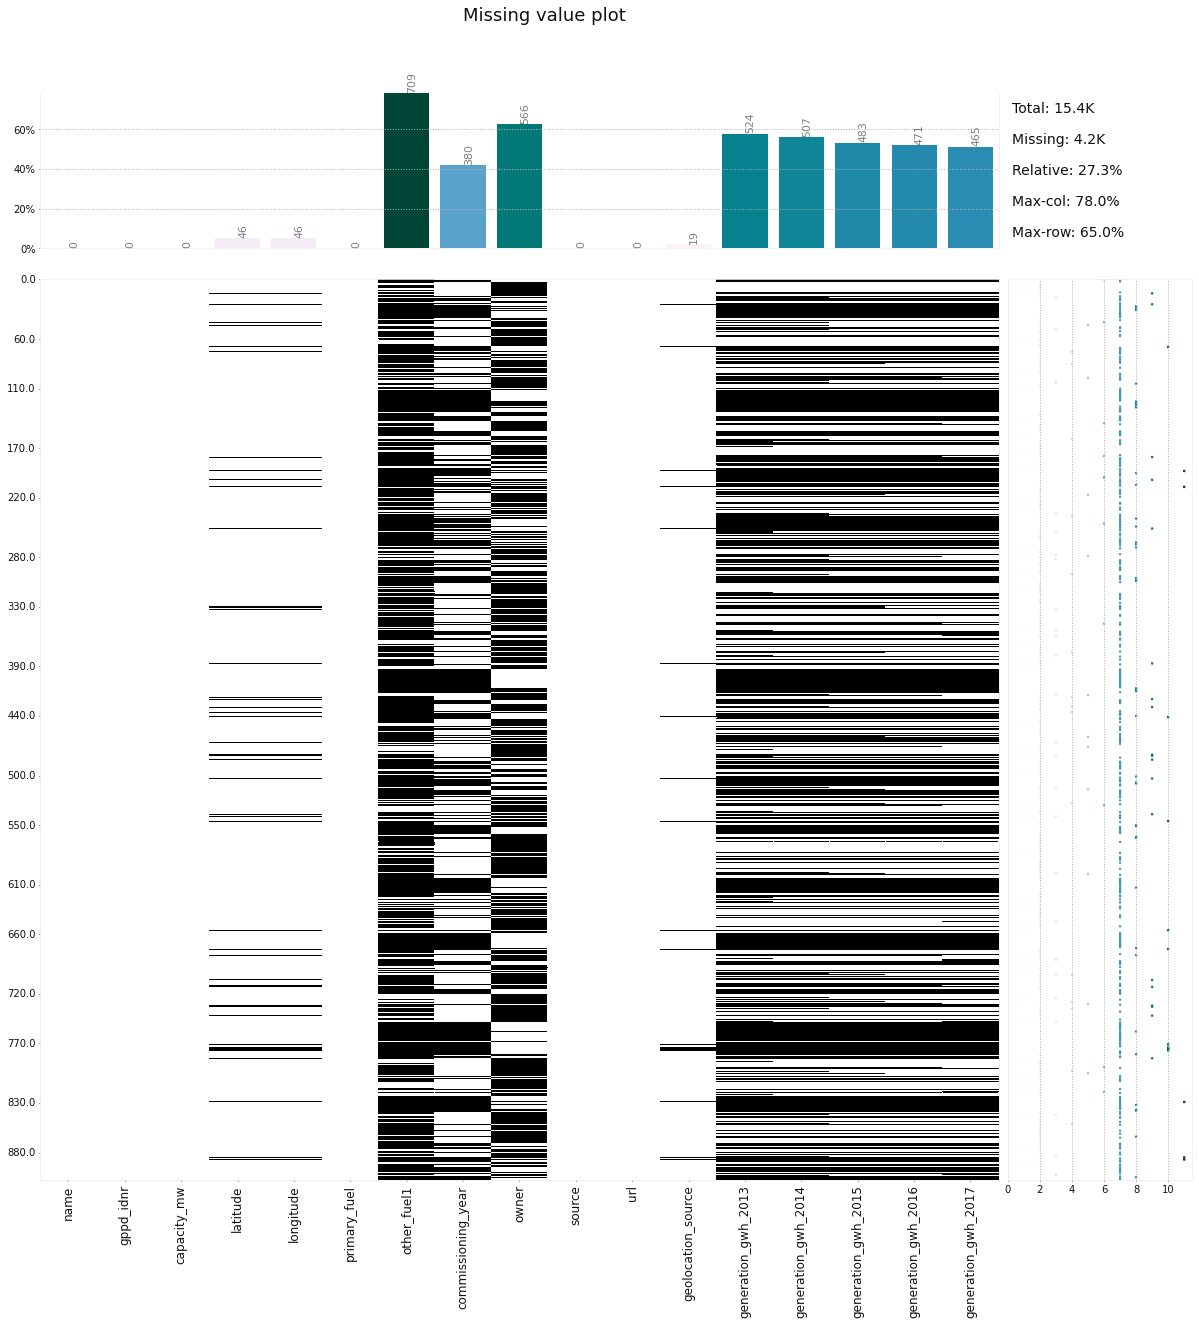

In [17]:
import klib
klib.missingval_plot(Data_Day) ## No graph will be plotted if the dataset has no missing value

In [18]:
# Check NA Values
Data_Day.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  566
source                   0
url                      0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [19]:
# total 10 outliers found. Now, impute the values, by the help of median.
Data_Day['latitude'] = Data_Day['latitude'].fillna(Data_Day['latitude'].mean())
Data_Day['longitude'] = Data_Day['longitude'].fillna(Data_Day['longitude'].mean())
Data_Day['commissioning_year'] = Data_Day['commissioning_year'].fillna(Data_Day['commissioning_year'].median()).round()
Data_Day['generation_gwh_2013'] = Data_Day['generation_gwh_2013'].fillna(Data_Day['generation_gwh_2013'].mean()).round()
Data_Day['generation_gwh_2014'] = Data_Day['generation_gwh_2014'].fillna(Data_Day['generation_gwh_2014'].mean()).round()
Data_Day['generation_gwh_2015'] = Data_Day['generation_gwh_2015'].fillna(Data_Day['generation_gwh_2015'].mean()).round()
Data_Day['generation_gwh_2016'] = Data_Day['generation_gwh_2016'].fillna(Data_Day['generation_gwh_2016'].mean()).round()
Data_Day['generation_gwh_2017'] = Data_Day['generation_gwh_2017'].fillna(Data_Day['generation_gwh_2017'].mean()).round()

import numpy as np
Data_Day['owner'] = Data_Day.fillna(value=np.nan)
Data_Day

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,ACME Solar Tower,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2304.0,2420.0,2414.0,2454.0,2532.0
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,2000.0,ADITYA CEMENT WORKS,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2304.0,2420.0,2414.0,2454.0,2532.0
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,2000.0,AES Saurashtra Windfarms,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2304.0,2420.0,2414.0,2454.0,2532.0
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,AGARTALA GT,Central Electricity Authority,http://www.cea.nic.in/,WRI,632.0,618.0,844.0,886.0,664.0
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,AKALTARA TPP,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.0,3036.0,5916.0,6243.0,5386.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,YERMARUS TPP,Central Electricity Authority,http://www.cea.nic.in/,WRI,2304.0,2420.0,1.0,234.0,865.0
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,2000.0,Yelesandra Solar Power Plant,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2304.0,2420.0,2414.0,2454.0,2532.0
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,2000.0,Yelisirur wind power project,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2304.0,2420.0,2414.0,2454.0,2532.0
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,2000.0,ZAWAR MINES,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2304.0,2420.0,2414.0,2454.0,2532.0


name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1            709
commissioning_year       0
owner                    0
source                   0
url                      0
geolocation_source      19
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

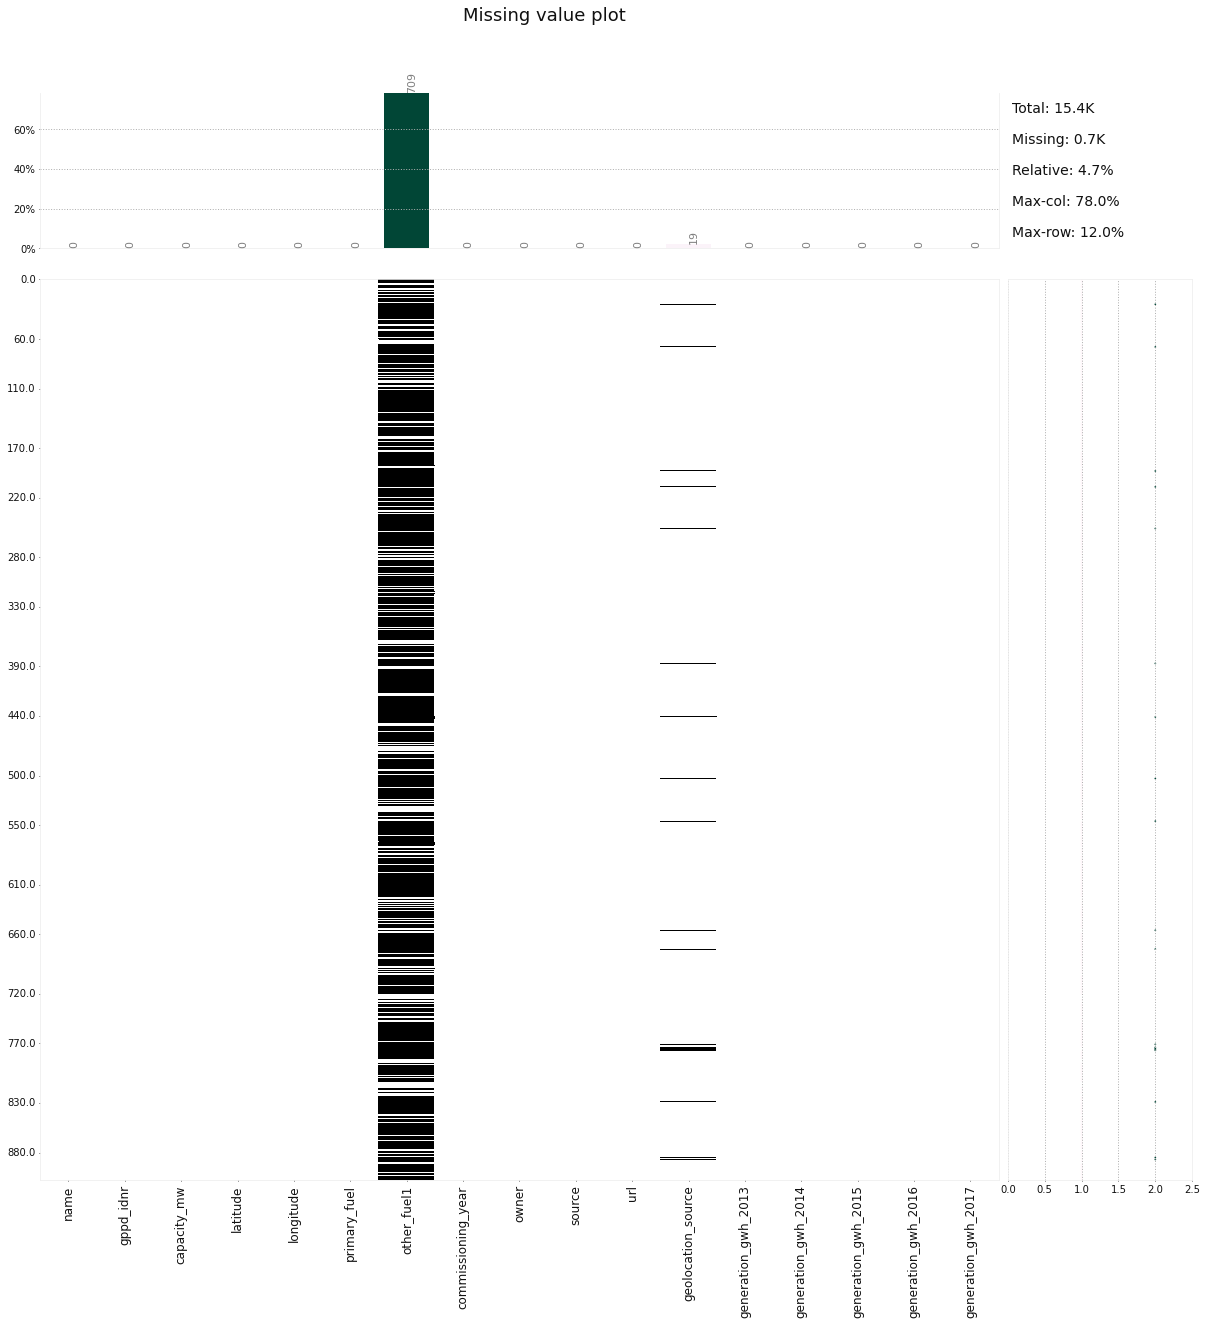

In [20]:
klib.missingval_plot(Data_Day) ## No graph will be plotted if the dataset has no missing value
Data_Day.isnull().sum()

In [21]:
Data_Day.nunique()

name                   908
gppd_idnr              908
capacity_mw            365
latitude               838
longitude              829
primary_fuel             8
other_fuel1              3
commissioning_year      73
owner                  908
source                 191
url                    304
geolocation_source       3
generation_gwh_2013    348
generation_gwh_2014    354
generation_gwh_2015    370
generation_gwh_2016    372
generation_gwh_2017    383
dtype: int64

In [22]:
#Data Types of Varaibles
print(Data_Day.dtypes)

name                    object
gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
owner                   object
source                  object
url                     object
geolocation_source      object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object


In [23]:
# Encode Categorical Columns
categorical_var = ['primary_fuel']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Data_Day[categorical_var] = Data_Day[categorical_var].apply(le.fit_transform)
Data_Day

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,6,NaN,2011.0,ACME Solar Tower,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2304.0,2420.0,2414.0,2454.0,2532.0
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1,NaN,2000.0,ADITYA CEMENT WORKS,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2304.0,2420.0,2414.0,2454.0,2532.0
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,7,NaN,2000.0,AES Saurashtra Windfarms,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2304.0,2420.0,2414.0,2454.0,2532.0
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2,NaN,2004.0,AGARTALA GT,Central Electricity Authority,http://www.cea.nic.in/,WRI,632.0,618.0,844.0,886.0,664.0
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,1,Oil,2015.0,AKALTARA TPP,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.0,3036.0,5916.0,6243.0,5386.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,1,Oil,2016.0,YERMARUS TPP,Central Electricity Authority,http://www.cea.nic.in/,WRI,2304.0,2420.0,1.0,234.0,865.0
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,6,NaN,2000.0,Yelesandra Solar Power Plant,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2304.0,2420.0,2414.0,2454.0,2532.0
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,7,NaN,2000.0,Yelisirur wind power project,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2304.0,2420.0,2414.0,2454.0,2532.0
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,1,NaN,2000.0,ZAWAR MINES,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2304.0,2420.0,2414.0,2454.0,2532.0


In [24]:
#Outlier analysis

In [25]:
var = ['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source', 'url', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017']
numeric_var = ['capacity_mw', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']
categorical_var = ['source', 'primary_fuel', 'other_fuel1', 'commissioning_year', 'source', 'geolocation_source']

capacity_mw


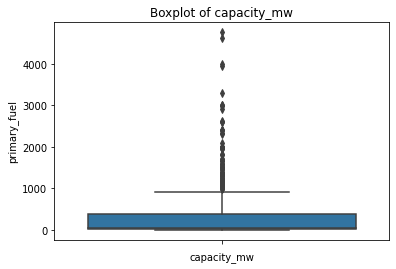

generation_gwh_2013


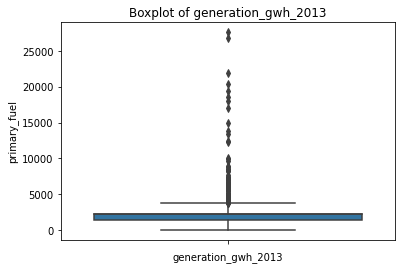

generation_gwh_2014


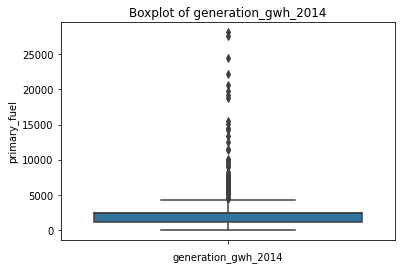

generation_gwh_2015


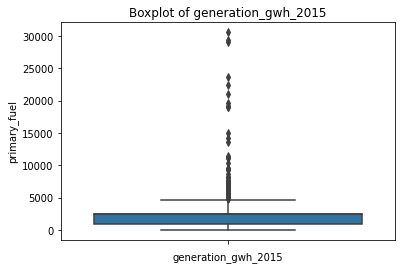

generation_gwh_2016


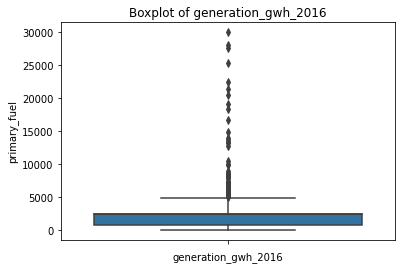

generation_gwh_2017


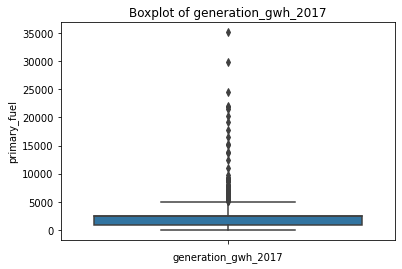

In [26]:
for i in numeric_var:
    print(i)
    sns.boxplot(y = Data_Day[i])
    plt.xlabel(i)
    plt.ylabel("primary_fuel")
    plt.title("Boxplot of " + i)
    plt.show()

***We are getting some outliers in the above graphs.***

In [27]:
# Identify outliers
#calculate Inner Fence, Outer Fence, and IQR

for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(Data_Day.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))

# replace outliers with NA
    Data_Day.loc[Data_Day[i]<Innerfence, i] = np.nan
    Data_Day.loc[Data_Day[i]>Upperfence, i] = np.nan

capacity_mw
Innerfence= -540.0937500000001
Upperfence= 945.0562500000001
IQR =371.2875
generation_gwh_2013
Innerfence= -124.125
Upperfence= 3760.875
IQR =971.25
generation_gwh_2014
Innerfence= -692.5
Upperfence= 4287.5
IQR =1245.0
generation_gwh_2015
Innerfence= -1434.75
Upperfence= 4723.25
IQR =1539.5
generation_gwh_2016
Innerfence= -1614.125
Upperfence= 4894.875
IQR =1627.25
generation_gwh_2017
Innerfence= -1666.125
Upperfence= 5050.875
IQR =1679.25


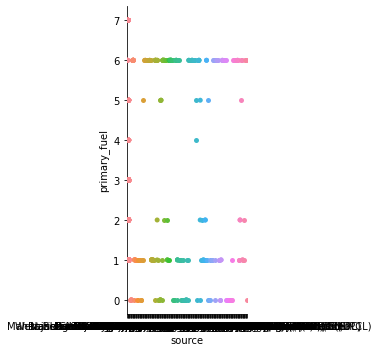

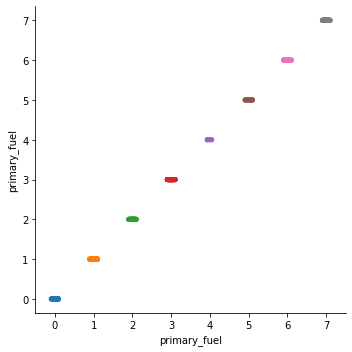

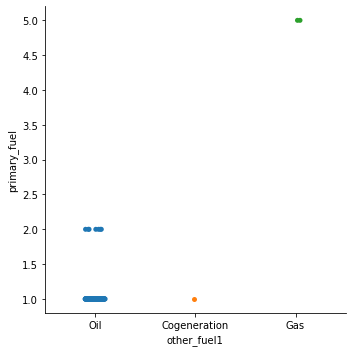

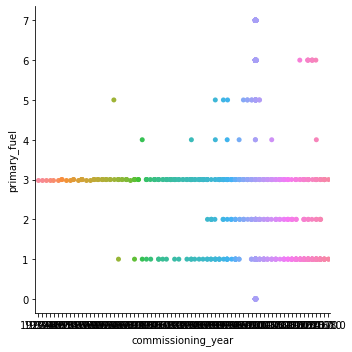

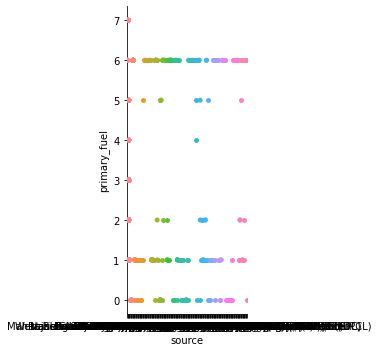

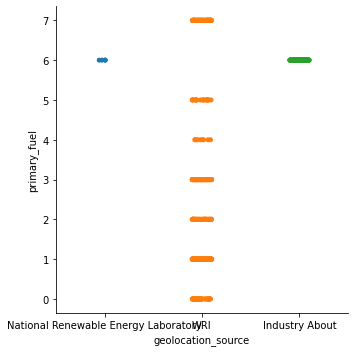

In [28]:
for i in categorical_var:
  sns.catplot(x = i, y = "primary_fuel", data=Data_Day, linewidths=.15)

                     capacity_mw  ...  generation_gwh_2017
capacity_mw             1.000000  ...            -0.160518
latitude                0.080280  ...            -0.015213
longitude               0.233137  ...            -0.250785
primary_fuel           -0.368845  ...             0.187282
commissioning_year      0.114952  ...             0.166932
generation_gwh_2013    -0.135418  ...             0.778112
generation_gwh_2014    -0.071922  ...             0.767589
generation_gwh_2015    -0.135283  ...             0.835814
generation_gwh_2016    -0.161306  ...             0.887886
generation_gwh_2017    -0.160518  ...             1.000000

[10 rows x 10 columns]


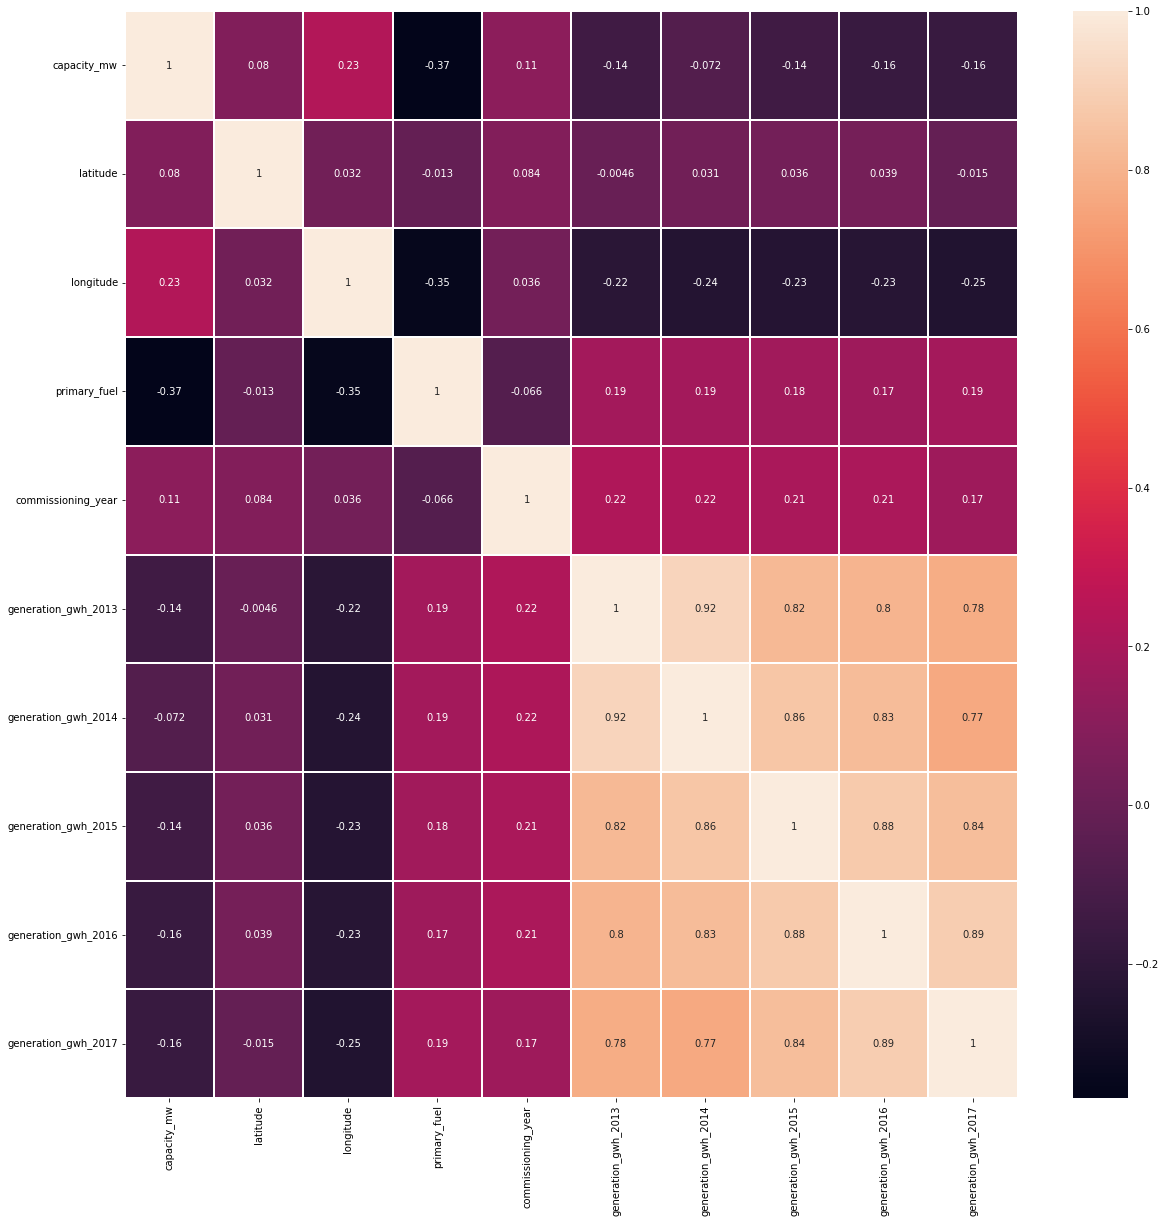

In [29]:
#Feature engineering
# Correlation Analysis and Anova test to find varaibles which can be excluded
Data_Day_cor = Data_Day.loc[:, var]
correlation_result = Data_Day_cor.corr()
print(correlation_result)
fig, ax = plt.subplots(figsize=(20,20)) ##To plot the heatmap into our required size
heatmap = sns.heatmap(correlation_result, annot=True, linewidths=1)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


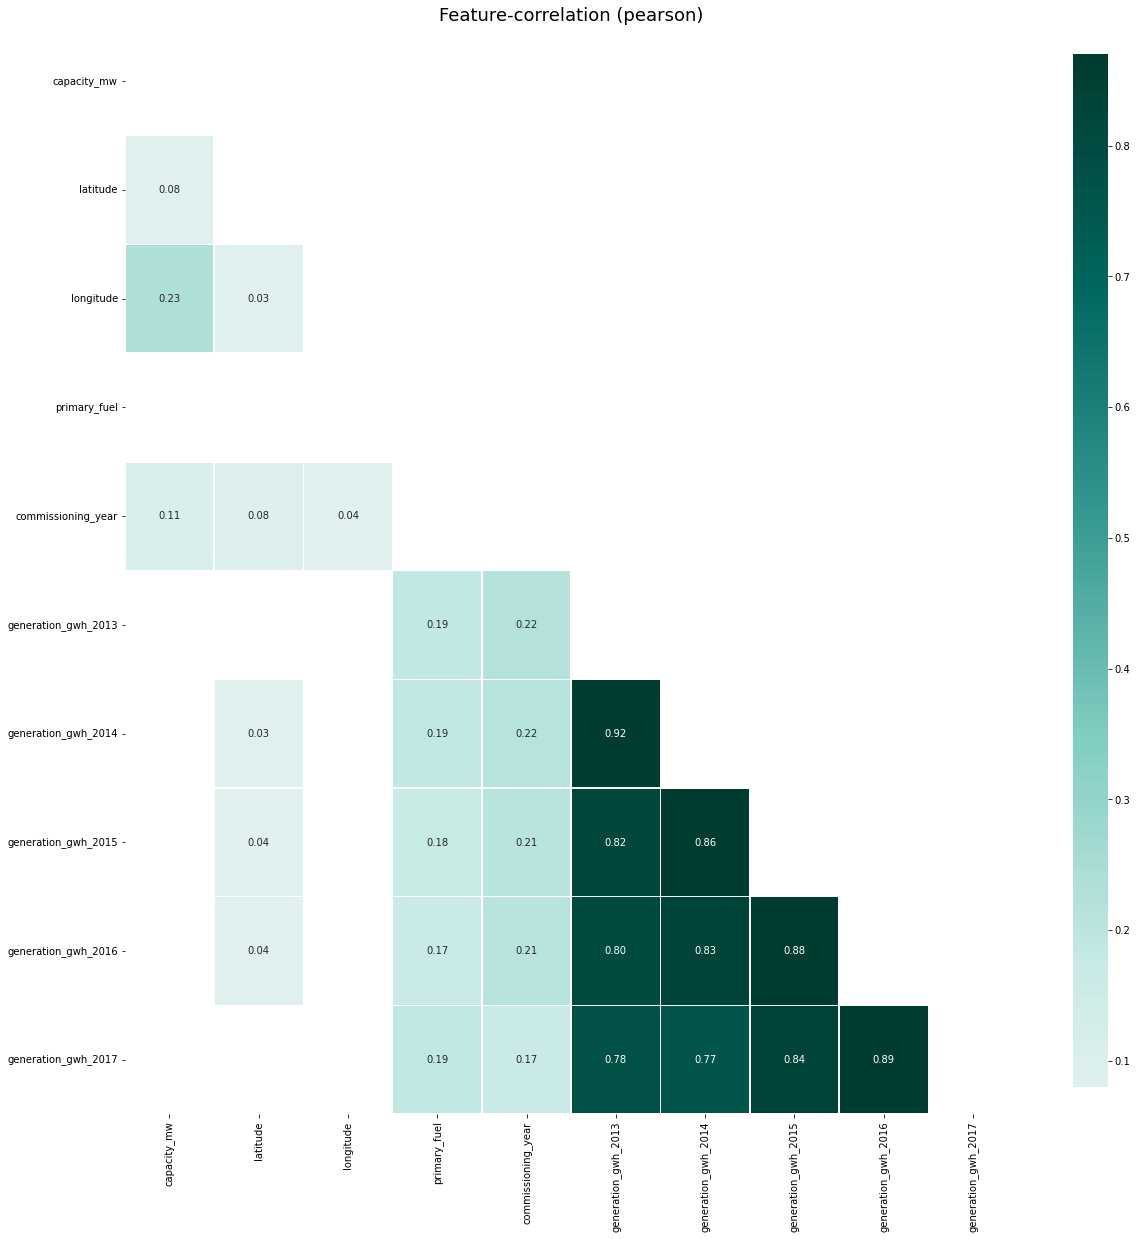

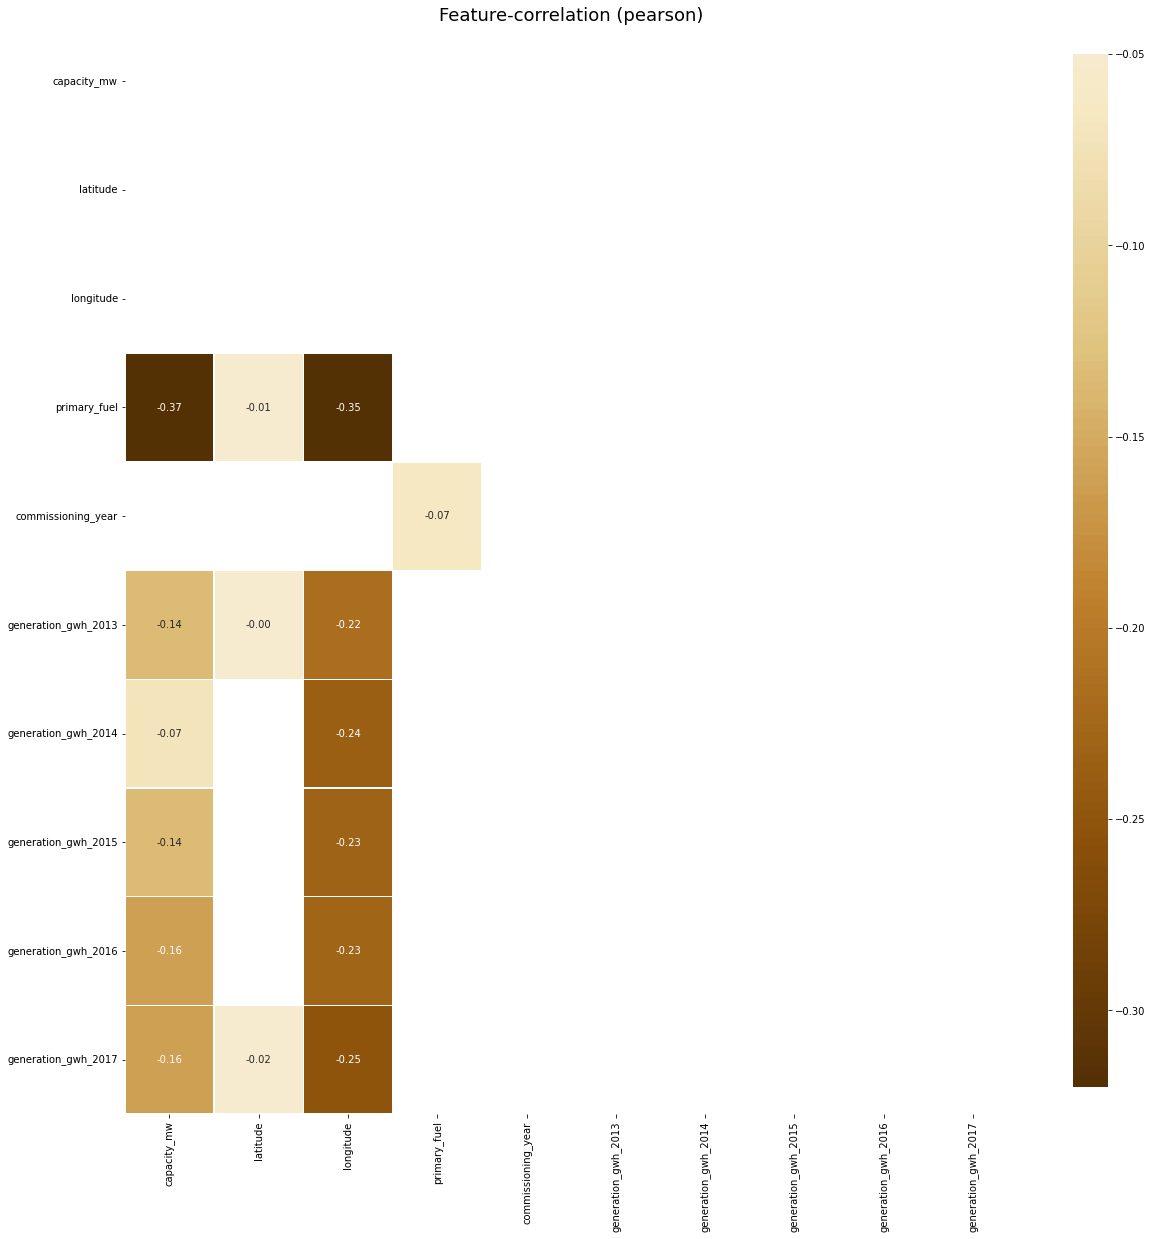

In [30]:
klib.corr_plot(Data_Day, split="pos", figsize=(20,20))
klib.corr_plot(Data_Day, split="neg", figsize=(20,20))

So in this way upon having the look at correlation graph we can eaisly infer that 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' has has stromng relationship bond & therefore these may make our model complex & produce faulty results. There fore some of these variables have to be removed.

In [31]:
Data_Day.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,796.000000,908.000000,908.000000,908.000000,908.000000,835.000000,840.000000,839.000000,837.000000,831.000000
mean,140.266747,21.196189,77.447848,3.205947,1998.183921,1784.256287,1863.292857,1829.655542,1850.058542,1893.080626
std,203.602099,6.088110,4.781201,2.281339,13.085938,900.120067,984.819173,1046.414094,1083.735235,1111.979690
min,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,17.057825,74.390250,1.000000,1997.000000,1011.500000,936.000000,686.500000,670.000000,643.000000
50%,40.000000,21.278850,76.978950,3.000000,2000.000000,2304.000000,2420.000000,2414.000000,2454.000000,2532.000000
75%,160.250000,25.183775,79.211600,6.000000,2003.000000,2304.000000,2420.000000,2414.000000,2454.000000,2532.000000
max,920.000000,34.649000,95.408000,7.000000,2018.000000,3739.000000,4219.000000,4703.000000,4893.000000,5026.000000


In [32]:
Data_Day.drop(['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' ], axis='columns', inplace = True)
Data_Day

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,6,NaN,2011.0,ACME Solar Tower,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2304.0
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1,NaN,2000.0,ADITYA CEMENT WORKS,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2304.0
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,7,NaN,2000.0,AES Saurashtra Windfarms,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2304.0
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2,NaN,2004.0,AGARTALA GT,Central Electricity Authority,http://www.cea.nic.in/,WRI,632.0
4,AKALTARA TPP,IND0000002,NaN,21.9603,82.4091,1,Oil,2015.0,AKALTARA TPP,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,NaN,16.2949,77.3568,1,Oil,2016.0,YERMARUS TPP,Central Electricity Authority,http://www.cea.nic.in/,WRI,2304.0
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,6,NaN,2000.0,Yelesandra Solar Power Plant,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2304.0
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,7,NaN,2000.0,Yelisirur wind power project,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2304.0
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,1,NaN,2000.0,ZAWAR MINES,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2304.0


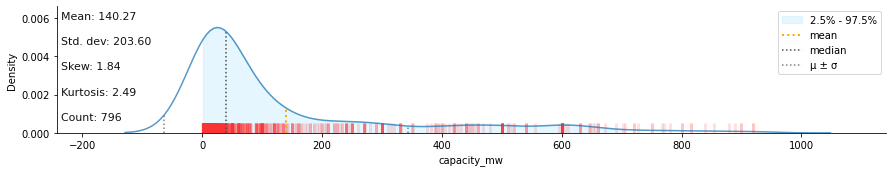

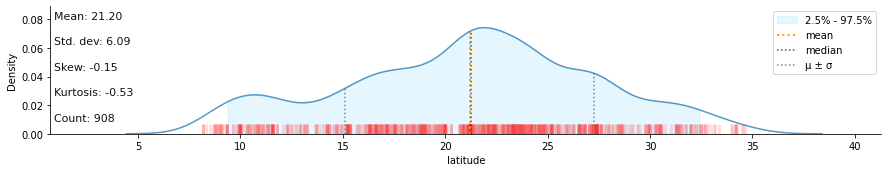

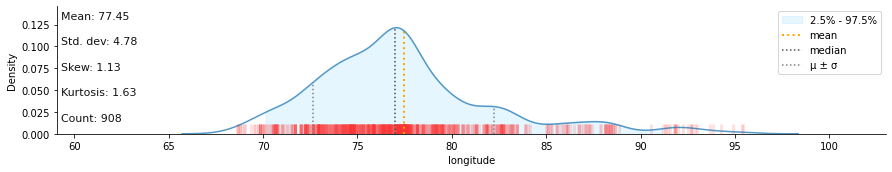

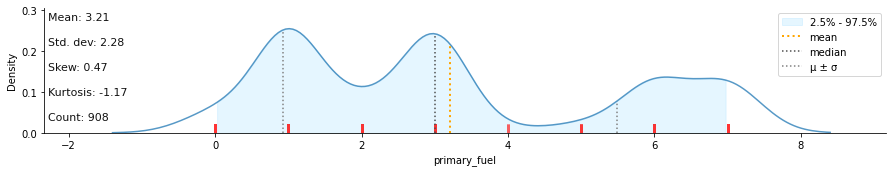

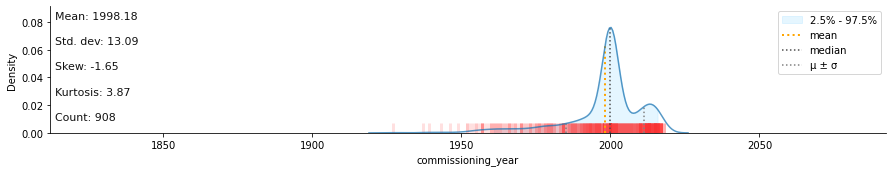

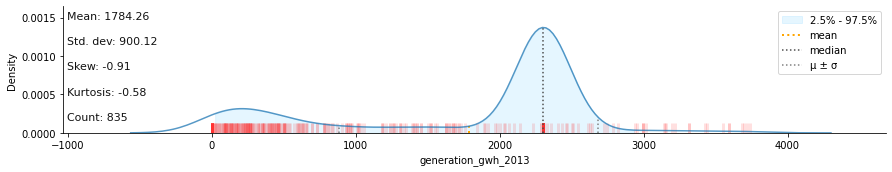

In [33]:
#Feature scalling
klib.dist_plot(Data_Day)

***Here we can eaisly infer that almost every variable is distributed  allmost normely in bell curve, except some nitty gritty deviation in some variable.

In [34]:
!pip install pycaret[Full]==2.3. 4

In [35]:
from pycaret.classification import *
exp1 = setup(Data_Day, target = 'primary_fuel')

,Description,Value
0,session_id,3135
1,Target,primary_fuel
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7"
4,Original Data,"(908, 13)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [36]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9150,0.5941,0.7196,0.9011,0.8961,0.8906,0.8947,13.451
lightgbm,Light Gradient Boosting Machine,0.9071,0.5933,0.7431,0.8968,0.8963,0.8814,0.8838,0.376
rf,Random Forest Classifier,0.9055,0.5939,0.7172,0.8903,0.8876,0.8785,0.8821,0.557
xgboost,Extreme Gradient Boosting,0.8993,0.5921,0.7335,0.8886,0.8870,0.8711,0.8738,14.568
et,Extra Trees Classifier,0.8960,0.5933,0.6942,0.8715,0.8705,0.8656,0.8715,0.539
gbc,Gradient Boosting Classifier,0.8930,0.5923,0.6803,0.8727,0.8700,0.8617,0.8665,2.932
dt,Decision Tree Classifier,0.8850,0.5600,0.7119,0.8831,0.8812,0.8547,0.8562,0.042
ridge,Ridge Classifier,0.8646,0.0000,0.5887,0.7917,0.8132,0.8217,0.8323,0.042
lda,Linear Discriminant Analysis,0.8423,0.5809,0.6361,0.8008,0.8071,0.7978,0.8080,0.151
ada,Ada Boost Classifier,0.7763,0.5219,0.4961,0.7105,0.7222,0.7029,0.7351,0.207


In [37]:
# check the best model
print(best_model)

In [38]:
# predict on hold-out
pred_holdout = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8681,0.9804,0.6276,0.844,0.8429,0.8326,0.8364


In [39]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9531,0.0000,0.8214,0.9257,0.9374,0.9395,0.9411
1,0.9375,0.0000,0.8857,0.9450,0.9187,0.9199,0.9238
2,0.8906,0.0000,0.7381,0.8306,0.8523,0.8579,0.8657
3,0.9219,0.0000,0.7357,0.9161,0.9055,0.8992,0.9029
4,0.8750,0.9927,0.6118,0.8624,0.8439,0.8387,0.8450
5,0.8730,0.9880,0.6722,0.8968,0.8742,0.8405,0.8442
6,0.9048,0.9851,0.6500,0.9054,0.8803,0.8759,0.8824
7,0.9206,0.9935,0.6760,0.8954,0.9056,0.8980,0.8999
8,0.9365,0.9934,0.7176,0.9183,0.9246,0.9195,0.9207
9,0.9365,0.9881,0.6875,0.9158,0.9184,0.9173,0.9209


In [40]:
tuned_model = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9531,0.0000,0.8214,0.9257,0.9374,0.9395,0.9411
1,0.9219,0.0000,0.8143,0.9317,0.9011,0.8994,0.9039
2,0.8750,0.0000,0.6667,0.7993,0.8315,0.8374,0.8442
3,0.9062,0.0000,0.7000,0.9040,0.8868,0.8785,0.8834
4,0.9062,0.9873,0.6681,0.8895,0.8846,0.8800,0.8841
5,0.8889,0.9873,0.6792,0.8748,0.8737,0.8582,0.8610
6,0.9048,0.9827,0.6500,0.9054,0.8803,0.8759,0.8824
7,0.9206,0.9946,0.6583,0.8923,0.9025,0.8975,0.8998
8,0.9206,0.9902,0.6926,0.8919,0.9040,0.8985,0.8997
9,0.9365,0.9787,0.6875,0.9158,0.9184,0.9173,0.9209


In [41]:
#catboost_bagged = ensemble_model(catboost)

***Ensembling is not coming usp with better results therefore we may consider tuned_model for further analysis.***

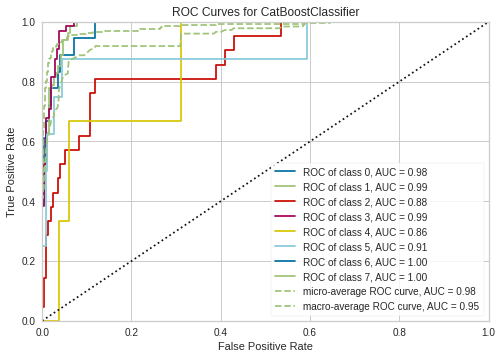

In [42]:
# AUC plot
plot_model(tuned_model, plot = 'auc')

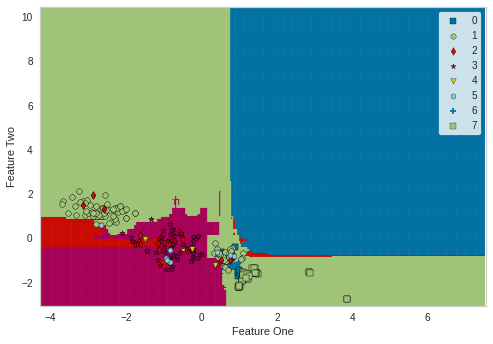

In [43]:
# Decision Boundary
plot_model(tuned_model, plot = 'boundary')

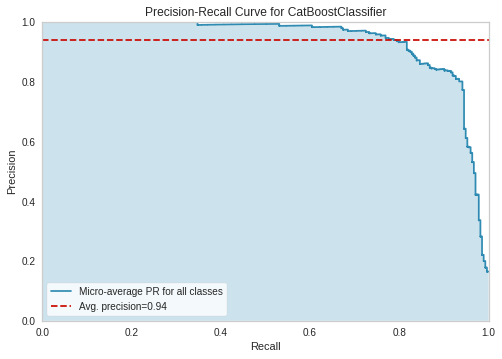

In [44]:
# Precision Recall Curve
plot_model(tuned_model, plot = 'pr')

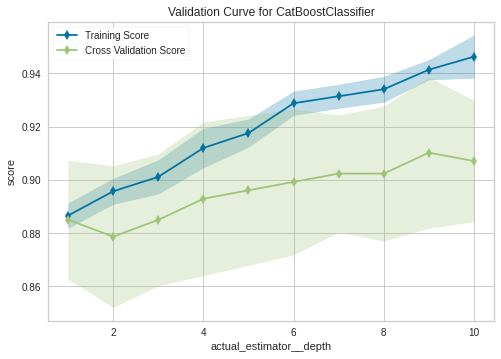

In [45]:
# Validation Curve
plot_model(tuned_model, plot = 'vc')

In [47]:
evaluate_model(tuned_model) ###Clicking atr various icons wilkl producs respective graphs

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [48]:
evaluate_model(tuned_model) ###Clicking atr various icons wilkl produces respective graphs on a live kernel

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

***TypeError:*** This function only supports tree based models for binary classification: xgboost, catboost, rf, et, lightgbm, dt.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9531,0.0000,0.8214,0.9257,0.9374,0.9395,0.9411
1,0.9375,0.0000,0.8857,0.9450,0.9187,0.9199,0.9238
2,0.8906,0.0000,0.7381,0.8306,0.8523,0.8579,0.8657
3,0.9219,0.0000,0.7357,0.9161,0.9055,0.8992,0.9029
4,0.8750,0.9927,0.6118,0.8624,0.8439,0.8387,0.8450
5,0.8730,0.9880,0.6722,0.8968,0.8742,0.8405,0.8442
6,0.9048,0.9851,0.6500,0.9054,0.8803,0.8759,0.8824
7,0.9206,0.9935,0.6760,0.8954,0.9056,0.8980,0.8999
8,0.9365,0.9934,0.7176,0.9183,0.9246,0.9195,0.9207
9,0.9365,0.9881,0.6875,0.9158,0.9184,0.9173,0.9209


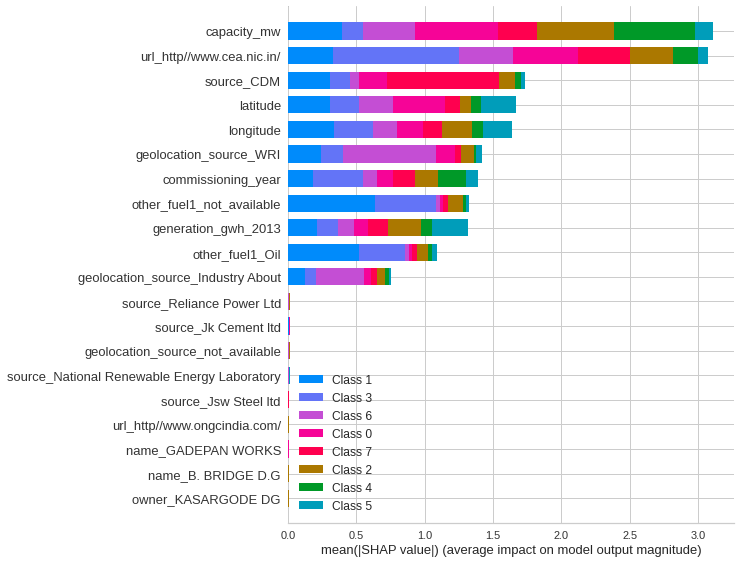

TypeError: ignored

In [49]:
# create a model
catboost = create_model('catboost')
# summary plot
interpret_model(catboost)
# correlation plot
interpret_model(catboost, plot = 'correlation')

In [51]:
# predict test / hold-out dataset
catboost_holdout_pred = predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8681,0.9804,0.6276,0.844,0.8429,0.8326,0.8364


In [52]:
predictions = predict_model(catboost, data = Data_Day)
predictions

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,Label,Score
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,6,NaN,2011.0,ACME Solar Tower,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2304.0,6,0.9542
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1,NaN,2000.0,ADITYA CEMENT WORKS,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2304.0,1,0.8963
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,7,NaN,2000.0,AES Saurashtra Windfarms,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2304.0,7,0.9699
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2,NaN,2004.0,AGARTALA GT,Central Electricity Authority,http://www.cea.nic.in/,WRI,632.0,2,0.5677
4,AKALTARA TPP,IND0000002,NaN,21.9603,82.4091,1,Oil,2015.0,AKALTARA TPP,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.0,1,0.9937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,NaN,16.2949,77.3568,1,Oil,2016.0,YERMARUS TPP,Central Electricity Authority,http://www.cea.nic.in/,WRI,2304.0,1,0.9842
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,6,NaN,2000.0,Yelesandra Solar Power Plant,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2304.0,6,0.9545
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,7,NaN,2000.0,Yelisirur wind power project,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2304.0,7,0.9649
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,1,NaN,2000.0,ZAWAR MINES,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2304.0,1,0.8752


***Regression***

In [53]:
from pycaret.regression import *
s = setup(Data_Day, target = 'capacity_mw')

,Description,Value
0,session_id,6069
1,Target,capacity_mw
2,Original Data,"(908, 13)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(550, 414)"


In [54]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [55]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,7.214560e+01,1.651210e+04,1.223382e+02,6.334000e-01,1.0866,2.444700e+00,0.267
catboost,CatBoost Regressor,6.965120e+01,1.651565e+04,1.216052e+02,6.334000e-01,0.9915,1.864600e+00,2.854
rf,Random Forest Regressor,6.706880e+01,1.653198e+04,1.223181e+02,6.237000e-01,0.8702,1.118600e+00,0.902
lightgbm,Light Gradient Boosting Machine,7.660420e+01,1.867647e+04,1.292363e+02,5.749000e-01,1.1523,2.339100e+00,0.061
xgboost,Extreme Gradient Boosting,6.958250e+01,1.778340e+04,1.278964e+02,5.736000e-01,0.9347,1.459700e+00,6.744
knn,K Neighbors Regressor,8.033030e+01,1.845956e+04,1.299722e+02,5.637000e-01,1.0720,2.493700e+00,0.076
et,Extra Trees Regressor,7.409840e+01,1.969820e+04,1.346291e+02,5.443000e-01,0.8940,1.227700e+00,0.912
br,Bayesian Ridge,9.511720e+01,2.298133e+04,1.485958e+02,4.451000e-01,1.2668,3.483000e+00,0.577
ridge,Ridge Regression,9.534970e+01,2.303297e+04,1.487447e+02,4.443000e-01,1.2787,3.435500e+00,0.027
lasso,Lasso Regression,9.553950e+01,2.320389e+04,1.494795e+02,4.366000e-01,1.3059,3.791700e+00,0.032


In [56]:
print(best_model)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6069, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [57]:
# predict on hold-out
pred_holdout = predict_model(best_model)
pred_holdout

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,69.6573,14047.6011,118.5226,0.5745,1.1189,2.6268


,latitude,longitude,commissioning_year,generation_gwh_2013,name_AKRIMOTA LIG,name_ALMATTI DAM,name_AMAR KANTAK,name_Askandra - Electromech Maritech Solar Power Plant,name_Askandra - Vasavi Solar Power Plant,name_BAGLIHAR HEP,name_BAMANIA CEMENT,name_BANSAGAR (II),name_BARSINGAR LIGNITE,name_BHATSA,name_BINA TPP,name_BUDGE BUDGE,name_Bap - GIS 1-2 Solar Power Plant,name_Bap - GIS 3 Solar Power Plant,name_Bera Wind Farm,name_Bitta Solar Power Plant,name_DADRI GT,name_DHUVARAN CCPP,name_DOLVI ISPAT,name_DULHASTI,name_DURGAPUR,name_EMCO Sonurle Wind Farm,name_GHANVI,name_GHAT PRABHA,name_GMR WARORA TPP,name_GUMTI,name_Gorsar Wind Farm,name_Gwal Pahari Solar Power Plant,name_I.P.GT,name_IDUKKI,name_IEPL BELA TPP,name_JAYPEE SIDHI CEMENT,name_KANHER,name_KASAIPALLI,name_KOJIKODE DG,name_KORBA-EAST,...,url_http//ujaas.com,url_http//viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf,url_http//www.acme.in,url_http//www.adanipower.com,url_http//www.ambujacement.com/,url_http//www.azurepower.com,url_http//www.cea.nic.in/,url_http//www.daundsugar.com/,url_http//www.firstsolarind.com,url_http//www.jalindia.com/subsidiaries.html,url_http//www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf,url_http//www.ntpc.co.in,url_http//www.peda.gov.in/main/SPVPowerProjects.html,url_http//www.sembcorp.com/en/media/features?Id=9179,url_http//www.shamrajenercon.com/cer16.htm,url_http//www.solairedirect.com,url_http//www.welspunrenewables.com,url_https//cdm.unfccc.int/Projects/DB/BVQI1351312018.91/view,url_https//cdm.unfccc.int/Projects/DB/BVQI1351922842.98/view,url_https//cdm.unfccc.int/Projects/DB/BVQI1354554757.67/view,url_https//cdm.unfccc.int/Projects/DB/DNV-CUK1216117082.43/view,url_https//cdm.unfccc.int/Projects/DB/DNV-CUK1351859167.83/view,url_https//cdm.unfccc.int/Projects/DB/KBS_Cert1356901324.44/view,url_https//cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view,url_https//cdm.unfccc.int/Projects/DB/PJR%20CDM1355461708.47/view,url_https//cdm.unfccc.int/Projects/DB/RWTUV1285157251.43/view,url_https//cdm.unfccc.int/Projects/DB/RWTUV1323884913.69/view,url_https//cdm.unfccc.int/Projects/DB/RWTUV1411994965.49/view,url_https//cdm.unfccc.int/Projects/DB/SGS-UKL1225104443.35/view,url_https//cdm.unfccc.int/filestorage/3/x/NUSA0ZGPJRT6YXIMEVOB74WDHQ5KF8.pdf/Final%20PDD.pdf?t=QzV8b2picHExfDDzqlVY2T6pSjzHeaKJVjyC,url_https//cdm.unfccc.int/filestorage/D/O/R/DORZF791H8K4NWACPQ5IMTUYLG2VXE/CDM_PDD_v6.pdf?t=WGN8b2sxbDRnfDDF8h6MT3w9DKjkxFa903Mt,url_https//cdm.unfccc.int/filestorage/K/H/4/KH4609PBJU1SRCMD8W7FNQ2LTZGIO5/ENRE%20PDD%20version%205_0_21_12_2010%20Clean%20Mode.pdf?t=dWt8b2picnVxfDDdBloH5bI-0qA-0I--EtaE,url_https//cdm.unfccc.int/filestorage/L/M/Z/LMZG56NYST19Q7IHD4EPXJRF2VB03W/PDD.pdf?t=R1p8b2picTYxfDApzXyA-gGP8NbbOgKvi68C,url_https//cdm.unfccc.int/filestorage/S/7/J/S7JBL0QFRHWA1DEZ2O4NUTG5Y6VKMP/PDD%20BASML%20Version%2003.pdf?t=Mmh8b2pxZWR0fDDj8zCpobgUeh2ry3t0r5N5,url_https//cdm.unfccc.int/filestorage/w/m/64TXH0Y1V9ZCISBKO3F758PEQNUJDR.pdf/PDD__V-2_5_19_10_2012.pdf?t=akh8b2pkZTFtfDAP0pu4sjZSao0P-GV-Qzqn,geolocation_source_Industry About,geolocation_source_WRI,geolocation_source_not_available,capacity_mw,Label
0,16.830099,80.040703,2016.0,2304.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43.00,514.428391
1,21.086599,85.098701,2000.0,2304.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.00,35.620174
2,21.196188,77.447845,2000.0,2304.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [59]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,82.2822,20563.3461,143.3993,0.5298,1.1128,2.4334
1,46.1848,9406.3569,96.9864,0.6432,1.1564,3.3678
2,65.5097,11330.6893,106.4457,0.7341,0.9685,2.1005
3,67.6693,12802.9574,113.1502,0.6737,1.1286,3.5041
4,95.5201,28572.2784,169.0334,0.5590,0.9946,1.8212
5,75.8789,15714.8642,125.3589,0.7153,1.0611,1.7701
6,58.3975,10002.1678,100.0108,0.8035,1.0925,2.4505
7,51.7446,6289.6735,79.3075,0.6668,1.0194,2.0972
8,52.1386,6357.5937,79.7345,0.6887,1.2090,3.4943
9,126.1298,44081.0894,209.9550,0.3196,1.1231,1.4076


In [60]:
tuned_model = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,96.5848,19469.1048,139.5317,0.5548,1.4467,5.3978
1,71.9558,10408.0019,102.0196,0.6052,1.6128,7.7903
2,77.9572,11641.7600,107.8970,0.7268,1.3011,4.5655
3,85.1571,16583.9175,128.7786,0.5774,1.4672,6.6633
4,119.8354,35671.9728,188.8703,0.4494,1.2639,3.4119
5,100.2018,23799.2897,154.2702,0.5689,1.2832,3.5370
6,83.0703,15951.5493,126.2994,0.6867,1.4923,4.7857
7,71.9512,8330.7637,91.2730,0.5586,1.4014,4.5087
8,67.2270,6993.6595,83.6281,0.6575,1.6083,7.1870
9,146.6449,52019.7452,228.0784,0.1970,1.2239,2.8057


In [61]:
evaluate_model(tuned_model)   ###Clicking atr various icons wilkl produces respective graphs on a live kernel

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…